In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

### Loading the input images

In [2]:
sample1 = './sample_images/vlcsnap-2022-10-10-10h19m26s597.png'
sample2 = './sample_images/vlcsnap-2022-10-10-10h19m34s968.png'
sample3 = './sample_images/vlcsnap-2022-10-10-10h19m42s567.png'
sample4 = './sample_images/vlcsnap-2022-10-10-10h20m00s631.png'
sample5 = './sample_images/vlcsnap-2022-10-10-10h20m10s269.png'
sample6 = './sample_images/vlcsnap-2022-10-10-10h20m16s883.png'

In [3]:
img1 = cv2.imread(sample1) # green
img2 = cv2.imread(sample2) # amber
img3 = cv2.imread(sample3) # red
img4 = cv2.imread(sample4) # occlusion
img5 = cv2.imread(sample5) # amber and red
img6 = cv2.imread(sample6) # green

In [4]:
def show(img, title='sample'):
    """
    helper function to display an image in jupyter notebook
    """
    if isinstance(img, str):
        img = cv2.imread(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

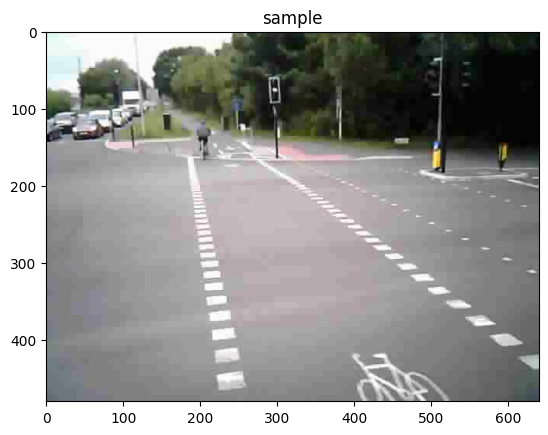

In [5]:
show(sample2)

### Manually identifying the red, amber, and green light regions

In [6]:
# region = (ymin, ymax, xmin, xmax)
regions = {'light': (63, 90, 292, 302),
          'red': (64, 70, 294, 300),
          'amber': (73, 79, 294, 300),
          'green': (83, 89, 295, 301)}

In [7]:
def show_traffic_lights(img):
    """
    Helper function to show the detected lights in jupyter notebook
    """
    # read image
    if isinstance(img, str):
        img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # create figure
    fig = plt.figure(figsize=(5, 5))
    rows = 1
    columns = 4
    # cropping the regions of interest
    ymin, ymax, xmin, xmax = regions['light']
    full = img[ymin:ymax, xmin:xmax]
    
    ymin, ymax, xmin, xmax = regions['red']
    red = img[ymin:ymax, xmin:xmax]
    
    ymin, ymax, xmin, xmax = regions['amber']
    amber = img[ymin:ymax, xmin:xmax]
    
    ymin, ymax, xmin, xmax = regions['green']
    green = img[ymin:ymax, xmin:xmax]
    
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)

    # showing image
    plt.imshow(full)
    plt.axis('off')
    plt.title("Whole lights")

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.imshow(red)
    plt.axis('off')
    plt.title("Red")

    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)

    # showing image
    plt.imshow(amber)
    plt.axis('off')
    plt.title("Amber")

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)

    # showing image
    plt.imshow(green)
    plt.axis('off')
    plt.title("Green")


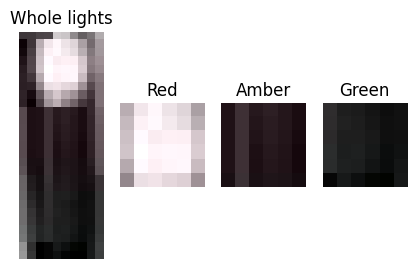

In [8]:
show_traffic_lights(img3)

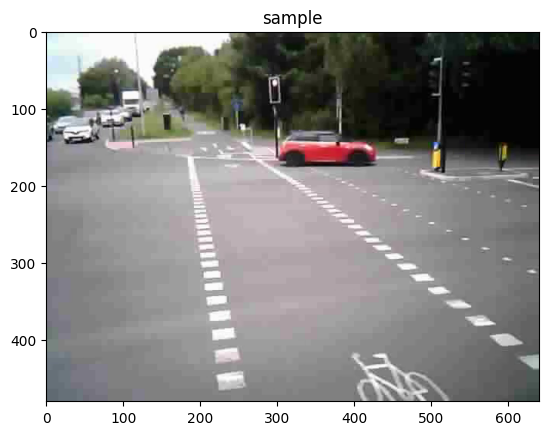

In [9]:
show(img3)

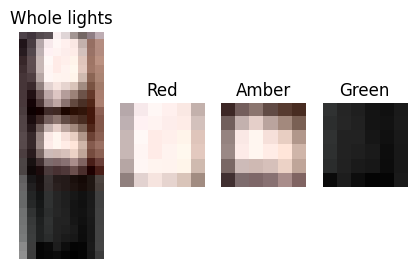

In [10]:
show_traffic_lights(img5)

### Manually saving the histograms for red, amber, and green lights one each as reference

In [11]:
ref_red_file = './reference_histograms/ref_red.npy'
ref_amber_file = './reference_histograms/ref_amber.npy'
ref_green_file = './reference_histograms/ref_green.npy'

In [12]:
# number of bins for histogram
nbins = 32

def calchist(img):
    '''
    Helper function to apply preprocessing and calculate histogram
    '''
    # applying gaussian smoothing
    img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
    # converting to grayscale before histogram calculation
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # if color image is used, use the below to calculate the histogram
    # cv2.calcHist([img], [0,1,2], None, [nbins,nbins,nbins], [0, 255, 0, 255, 0, 255])
    
    return cv2.calcHist([img], [0], None, [nbins], [0, 255]) 

In [13]:
# reference image with RED light on
ref_img = img3
ymin, ymax, xmin, xmax = regions['red']
reference_red = ref_img[ymin:ymax, xmin:xmax]

# calculating the histogram
ref_red_hist = calchist(reference_red)

# saving the histogram to file
with open(ref_red_file, 'wb') as f:
    np.save(f, ref_red_hist)

In [14]:
# reference image with AMBER light on
ref_img = img2
ymin, ymax, xmin, xmax = regions['amber']
reference_amber = ref_img[ymin:ymax, xmin:xmax]

# calculating the histogram
ref_amber_hist = calchist(reference_amber)

# saving the histogram to file
with open(ref_amber_file, 'wb') as f:
    np.save(f, ref_amber_hist)

In [15]:
# reference image with GREEN light on
ref_img = img1
ymin, ymax, xmin, xmax = regions['green']
reference_green = ref_img[ymin:ymax, xmin:xmax]

# calculating the histogram
ref_green_hist = calchist(reference_green)

# saving the histogram to file
with open(ref_green_file, 'wb') as f:
    np.save(f, ref_green_hist)

### Checking the traffic light condition based on histogram comparison

In [16]:
def check_traffic_lights(img):
    """
    Checking the traffic light conditions in current image 
    using a histogram comparison
    """
    # reading the image
    if isinstance(img, str):
        img = cv2.imread(img)
    
    # cropping the regions of interest
    ymin, ymax, xmin, xmax = regions['red']
    red = img[ymin:ymax, xmin:xmax]

    ymin, ymax, xmin, xmax = regions['amber']
    amber = img[ymin:ymax, xmin:xmax]
    
    ymin, ymax, xmin, xmax = regions['green']
    green = img[ymin:ymax, xmin:xmax]
    
    # ############################
    # Calculating histogram
    hist_red = calchist(red)
    hist_amber = calchist(amber)
    hist_green = calchist(green)
    
    # ############################
    # Reading the reference histograms
    # Note: No need to load always, can be cached or keep loaded in memory
    with open(ref_red_file, 'rb') as f:
        red_ref = np.load(f)
    
    with open(ref_amber_file, 'rb') as f:
        amber_ref = np.load(f)
    
    with open(ref_green_file, 'rb') as f:
        green_ref = np.load(f)
    
    # ############################
    # Compare histograms with reference histograms
    # The lower the score, the better (ie more similar) when using method=3
    method = 3
    red_score = cv2.compareHist(red_ref, hist_red, method)
    amber_score = cv2.compareHist(amber_ref, hist_amber, method)
    green_score = cv2.compareHist(green_ref, hist_green, method)
    print('red score: {:.3f}\namber score: {:.3f}\ngreen score: {:.3f}\n'.format(red_score, amber_score, green_score))
    # ############################
    
    # Rule based decision
    """
    Note: The color histogram of red alone and amber alone is significantly 
    different from that of read and amber together. There are not enough 
    samples to understand more about this and conclude and hence 
    proceeding with the grayscale histogram and the below rules.
    """
    threshold = 0.5
    
    is_red = red_score < threshold
    is_amber = amber_score < threshold
    is_green = green_score < threshold
    
    if is_red:
        print('RED')
    elif is_amber and not is_red and not is_green:
        print('AMBER')
    elif is_green and not is_red and not is_amber:
        print('GREEN')
    else:
        print('UNKNOWN')
    
    

### Detecting on all the sample images

red score: 1.000
amber score: 1.000
green score: 0.000

GREEN


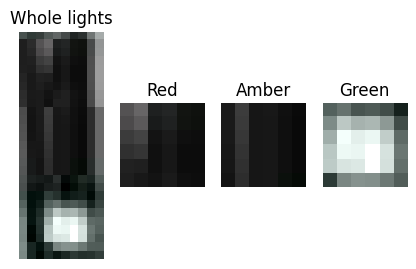

In [17]:
input_image = img1
show_traffic_lights(input_image)
check_traffic_lights(input_image)

red score: 1.000
amber score: 0.000
green score: 1.000

AMBER


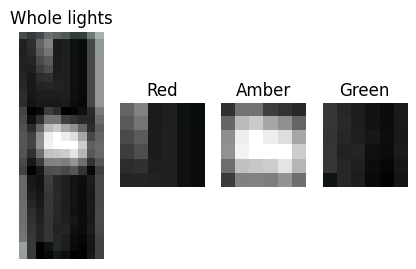

In [18]:
input_image = img2
show_traffic_lights(input_image)
check_traffic_lights(input_image)

red score: 0.000
amber score: 1.000
green score: 1.000

RED


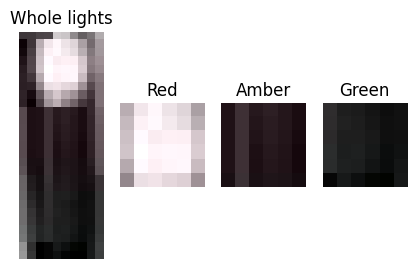

In [19]:
input_image = img3
show_traffic_lights(input_image)
check_traffic_lights(input_image)

red score: 1.000
amber score: 1.000
green score: 1.000

UNKNOWN


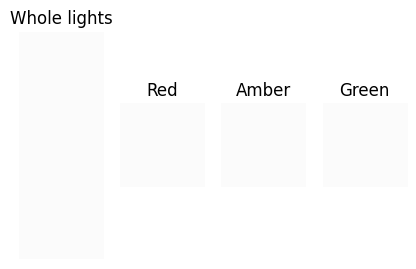

In [20]:
input_image = img4
show_traffic_lights(input_image)
check_traffic_lights(input_image)

red score: 0.059
amber score: 0.310
green score: 1.000

RED


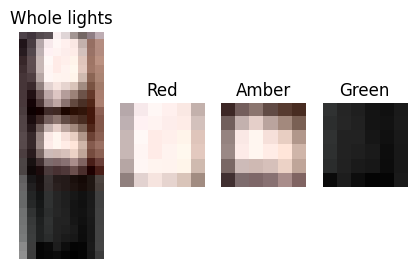

In [21]:
input_image = img5
show_traffic_lights(input_image)
check_traffic_lights(input_image)

red score: 1.000
amber score: 1.000
green score: 0.190

GREEN


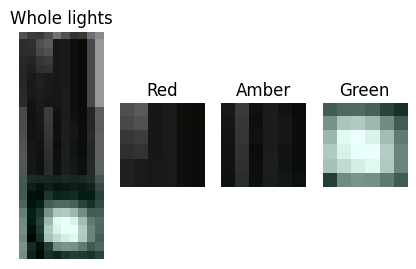

In [22]:
input_image = img6
show_traffic_lights(input_image)
check_traffic_lights(input_image)

Note: The color histogram of red alone and amber alone is significantly different from that of read and amber together. There are not enough samples to understand more about this and conclude and hence proceeding with grayscale histogram and hard coding the thresholding values as 0.5 for comparing the histograms.